In [3]:
#in this code, we modify the NN input at the begining of each new step block os period=Tbatch
import os
%matplotlib inline
os.environ['TF_CPP_MIN_LOG_LEVEL']="2"
import numpy as np # linear algebra
from pyvis.network import Network
import networkx as nx
from numpy import save
from numpy import load
import random
import math
from numpy import newaxis
from numpy import array
from numpy import array
import torch
torch.manual_seed(0)
from torch import nn
torch.pi = torch.acos(torch.zeros(1)).item() * 2 # which is 3.1415927410125732  
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
import array
from sklearn.metrics import confusion_matrix 
plt.style.use('seaborn-whitegrid')
print ('import completed')

import completed


In [4]:
torch.autograd.set_detect_anomaly(True)

#initializing the power time and distance
global N
global t
global Time_res
global Tnode
N=16
TT=2800 #NUMBER OF SLOTS IN THE TDMA FRAME 
Tbatch=10 #This denotes the number of iterations within which we obtain data
SncPer=280 # represents the period of iterations after which the clocks lose synchrony
t=torch.zeros((N,TT))
Tx_powers=1.995*np.ones((N,1), dtype=int)
N_height=1.5
AttExp = 4             # Attenuation Exponent (4 = 2-RAY MODEL)
AttConst = 1000**2       # Attenuation coefficient (e.g., Aeff)
X_max=10
Y_max=10
Time_res=torch.tensor(1/200)
p_0=3.9811 * (10**(-15)) # Threshold power
C = 3*(10**8);                 # speed of light in meters/second
Eps0=1


##### NEURAL NETWORKS

In [5]:
#lOADING EXAMPLE PARAMETERS AS TENSORS
location_X=torch.zeros((TT,N,1))
location_X[0,:,:]=torch.tensor(load('mycoordinateX.npy')) #X Co-ordinates of all the nodes

location_Y=torch.zeros((TT,N,1))
location_Y[0,:,:]=torch.tensor(load('mycoordinateY.npy')) #Y Co-ordinates of al the nodes

for time in range(1,TT):
    location_X[time,:,:]=location_X[0,:,:]
    location_Y[time,:,:]=location_Y[0,:,:]

#Allocating the different node distance randomly
Distance_matrix=torch.zeros((TT,N,N))
for i in range(N):
    for j in range(i+1, N):
        Distance_matrix[0,i,j]=1000*torch.sqrt(torch.square(location_X[0,j,0]-location_X[0,i,0])+torch.square(location_Y[0,j,0]-location_Y[0,i,0]))
        Distance_matrix[0,j,i]=Distance_matrix[0,i,j]

Distance_matrix[1:Tbatch,:,:]=Distance_matrix[0,:,:]

#Evaluating the time of flight across different node distances 
TimeOfFlight_Matrix = torch.zeros((TT,N,N))

for ii in range (N):
    for jj in range (N):
        TimeOfFlight_Matrix[0,ii,jj]=Distance_matrix[0,ii,jj]/C
        TimeOfFlight_Matrix[0,jj,ii]=TimeOfFlight_Matrix[0,ii,jj]

TimeOfFlight_Matrix[1:Tbatch,:,:]=TimeOfFlight_Matrix[0,:,:] #check this line

#Generating power RSSI matrix, i.e. Pr
#Row index = receiver, Column index = transmitter
RSSI_Matrix = torch.zeros((TT,N,N))
for i in range(N):
    for j in range(N):
        if i != j :     # If ii=jj the RSSI is infinite
            RSSI_Matrix[0,i,j] = (Tx_powers[j]*N_height**2)/(Distance_matrix[0,i,j]**AttExp)
            if RSSI_Matrix[0,i,j]<p_0:
                RSSI_Matrix[0,i,j]=0
        elif i == j:
            RSSI_Matrix[0,i,j] = 0

RSSI_Matrix[1:Tbatch,:,:]=RSSI_Matrix[0,:,:]
            
Tnode=load('myNodePeriod.npy')

t[:,0]=torch.tensor(load('myinitial_time.npy'))
timey=load('clockphase_fixedtrainFixedtest.npy')
timenump=np.zeros((N,TT))
timenump[:,0:Tbatch]=timey[:,0:Tbatch]

In [6]:
# Get cpu or gpu device for training.
device = "cpu" #if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))



# Defining the Network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        """this is the neural network 
        it can take a shape of 2*(N-1) columns by any rows
        the output layer is 2
        """
        #NN FOR NODE 0
        self.m0 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
        #NN FOR NODE 1
        
        self.m1 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
        
        #NN FOR NODE 2
        
        self.m2 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
        
        #NN FOR NODE 3
        self.m3 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
 
        #NN FOR NODE 4
        self.m4 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 5
        self.m5 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
        
        #NN FOR NODE 6
        self.m6 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 7
        self.m7 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 8
        self.m8 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 9
        self.m9 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 10
        self.m10 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )       
        
        #NN FOR NODE 11
        self.m11 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 12
        self.m12 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 13
        self.m13 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )        
        
        #NN FOR NODE 14
        self.m14 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )       
        
        #NN FOR NODE 15
        self.m15 = nn.Sequential(
            nn.Linear(2*(N-1),30),
            nn.Sigmoid(),
            nn.Linear(30,30),
            nn.Sigmoid(),
            nn.Linear(30,N-1),
            nn.Softmax(dim=1),
        )
 
    #FORWARD PASS FOR NODE 0
    def T0_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output0 = self.m0(x)
        return self.network_output0
    
    #FORWARD PASS FOR NODE 1
    def T1_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output1 = self.m1(x)
        return self.network_output1
    
    #FORWARD PASS FOR NODE 2
    def T2_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output2 = self.m2(x)
        return self.network_output2

    #FORWARD PASS FOR NODE 3
    def T3_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output3 = self.m3(x)
        return self.network_output3
    
    #FORWARD PASS FOR NODE 4
    def T4_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output4 = self.m4(x)
        return self.network_output4

    #FORWARD PASS FOR NODE 5
    def T5_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output5 = self.m5(x)
        return self.network_output5
    
    #FORWARD PASS FOR NODE 6
    def T6_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output6 = self.m6(x)
        return self.network_output6
    
    #FORWARD PASS FOR NODE 7
    def T7_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output7 = self.m7(x)
        return self.network_output7
    
    #FORWARD PASS FOR NODE 8
    def T8_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output8 = self.m8(x)
        return self.network_output8
    
    #FORWARD PASS FOR NODE 9
    def T9_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output9 = self.m9(x)
        return self.network_output9
    
    #FORWARD PASS FOR NODE 10
    def T10_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output10 = self.m10(x)
        return self.network_output10
    
    #FORWARD PASS FOR NODE 11
    def T11_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output11 = self.m11(x)
        return self.network_output11
    
    #FORWARD PASS FOR NODE 12
    def T12_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output12 = self.m12(x)
        return self.network_output12
    
    #FORWARD PASS FOR NODE 13
    def T13_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output13 = self.m13(x)
        return self.network_output13
    
    #FORWARD PASS FOR NODE 14
    def T14_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output14 = self.m14(x)
        return self.network_output14
    
    #FORWARD PASS FOR NODE 15
    def T15_forward(self, x):
        #x is input data that you want to pass into the neural network
        # self.network_output is network output
        self.network_output15 = self.m15(x)
        return self.network_output15
    
        
    
    
model = NeuralNetwork().to(device)

Using cpu device


In [7]:
#UPLOAD WEIGHTS FROM THE TRAINED MODEL
model.load_state_dict(torch.load('mymodelweights_only.pth'))

<All keys matched successfully>

##### TESTING WITH THE OTHER TIME INDICES AND INCLUDING MOBILITY 

In [8]:
#DEFINING THE FUNCTION TO OBTAIN WEIGHT FOR EACH NODE'S NN
def Dnn_Out(DNN_INPUT):
    #DNN_INPUT IS AN N X 2(N-1) MATRIX OF INPUT DATA
    Net_Weight={}
    Net_Weight[0] = model.T0_forward(DNN_INPUT[0:1,:]).reshape(1, (N-1))
    Net_Weight[1] = model.T1_forward(DNN_INPUT[1:2,:]).reshape(1, (N-1))
    Net_Weight[2] = model.T2_forward(DNN_INPUT[2:3,:]).reshape(1, (N-1))
    Net_Weight[3] = model.T3_forward(DNN_INPUT[3:4,:]).reshape(1, (N-1))
    Net_Weight[4] = model.T4_forward(DNN_INPUT[4:5,:]).reshape(1, (N-1))
    Net_Weight[5] = model.T5_forward(DNN_INPUT[5:6,:]).reshape(1, (N-1))
    Net_Weight[6] = model.T6_forward(DNN_INPUT[6:7,:]).reshape(1, (N-1))
    Net_Weight[7] = model.T7_forward(DNN_INPUT[7:8,:]).reshape(1, (N-1))
    Net_Weight[8] = model.T8_forward(DNN_INPUT[8:9,:]).reshape(1, (N-1))
    Net_Weight[9] = model.T9_forward(DNN_INPUT[9:10,:]).reshape(1, (N-1))
    Net_Weight[10] = model.T10_forward(DNN_INPUT[10:11,:]).reshape(1, (N-1))
    Net_Weight[11] = model.T11_forward(DNN_INPUT[11:12,:]).reshape(1, (N-1))
    Net_Weight[12] = model.T12_forward(DNN_INPUT[12:13,:]).reshape(1, (N-1))
    Net_Weight[13] = model.T13_forward(DNN_INPUT[13:14,:]).reshape(1, (N-1))
    Net_Weight[14] = model.T14_forward(DNN_INPUT[14:15,:]).reshape(1, (N-1))
    Net_Weight[15] = model.T15_forward(DNN_INPUT[15:16,:]).reshape(1, (N-1))
    
    return Net_Weight

In [40]:
speed=71.45 #defining walking speed of movement for some nodes
#Testing with the other time indexes and including mobility
# Nodeintest=torch.zeros(TT, N,2*N)
t_new = torch.zeros(N,N)
Nodeintest=torch.zeros((TT,N,2*(N-1)))
start=Tbatch-1
stop=TT
N_EXP=10
N_RESET=5 #Number of reset nodes in an iteration
# missclk=np.array([8, 15, 3, 6, 5])
# print(missclk)
MAT_location_X=np.zeros((N_EXP,TT,N,1))
MAT_location_Y=np.zeros((N_EXP,TT,N,1))
MAT_timenump=np.zeros((N_EXP,1,N,TT))
MAT_Distance_matrix=np.zeros((N_EXP,TT,N,N))
MAT_TimeOfFlight_Matrix =np.zeros((N_EXP,TT,N,N))
MAT_RSSI_Matrix=np.zeros((N_EXP,TT,N,N))
NN_weight=torch.zeros(N,(N-1))
diff=torch.zeros(N,N-1)
prod=torch.zeros(1,N)


for exp in range(N_EXP):
    for index in range(TT):
        MAT_location_X[exp,index,:,:]=location_X[index,:,:]
        MAT_location_Y[exp,index,:,:]=location_Y[index,:,:]

for exp in range(N_EXP):
    for index in range(Tbatch):
        MAT_timenump[exp,0,:,index]=timey[:,index]
        MAT_Distance_matrix[exp,index,:,:]=Distance_matrix[index,:,:]
        MAT_TimeOfFlight_Matrix[exp,index,:,:]=TimeOfFlight_Matrix[index,:,:]
        MAT_RSSI_Matrix[exp,index,:,:] = RSSI_Matrix[index,:,:]


MAT_missclk=[]
Theta=np.zeros((N_EXP,5))


for exp in range(N_EXP):
    print(exp)
    MAT_missclk.append(np.array(random.sample(range(N),5)))
    Theta[exp,:]=np.radians(random.sample(range(360),5))
    for i in range(start,stop):
        deg_ind=0
        for ncnt in MAT_missclk[exp]:
            MAT_location_X[exp,i,ncnt,0]=MAT_location_X[exp,i-1,ncnt,0]+(speed*Time_res/1000)*math.cos(Theta[exp,deg_ind])
            MAT_location_Y[exp,i,ncnt,0]=MAT_location_Y[exp,i-1,ncnt,0]+(speed*Time_res/1000)*math.sin(Theta[exp,deg_ind])
            deg_ind=deg_ind+1


        #Allocating the different node distance randomly for ii in range(N):
        for ii in range(N):
            for jj in range(ii+1, N):
                MAT_Distance_matrix[exp,i,ii,jj]=1000*np.sqrt(np.square(MAT_location_X[exp,i,jj,0]-MAT_location_X[exp,i,ii,0])+np.square(MAT_location_Y[exp,i,jj,0]-MAT_location_Y[exp,i,ii,0]))
                MAT_Distance_matrix[exp,i,jj,ii]=MAT_Distance_matrix[exp,i,ii,jj]


        #Evaluating the time of flight across different node distances 
        for ii in range (N):
            for jj in range (N):
                MAT_TimeOfFlight_Matrix[exp,i,ii,jj]=MAT_Distance_matrix[exp,i,ii,jj]/C
                MAT_TimeOfFlight_Matrix[exp,i,jj,ii]=MAT_TimeOfFlight_Matrix[exp,i,ii,jj]
         
        #Generating power RSSI matrix, i.e. Pr
        for ii in range(N):
            for jj in range(N):
                if ii != jj :     # If ii=jj the RSSI is infinite
                    MAT_RSSI_Matrix[exp,i,ii,jj] = (Tx_powers[jj]*N_height**2)/(MAT_Distance_matrix[exp,i,ii,jj]**AttExp)
                    if MAT_RSSI_Matrix[exp,i,ii,jj]<p_0:
                        MAT_RSSI_Matrix[exp,i,ii,jj]=0
                elif ii == jj:
                    MAT_RSSI_Matrix[exp,i,ii,jj] = 0

        #ORGANIZING NEW DATA FOR FORWARD PASS
        for ii in range(N):
            for jj in range(N):
                with torch.no_grad():
                    t_new[ii,jj]=MAT_timenump[exp,0,ii,i]+ MAT_TimeOfFlight_Matrix[exp,i,ii,jj]
                    if (MAT_RSSI_Matrix[exp,i,ii,jj]==0 and ii!=jj):
                        t_new[ii,jj]=0
                        
        for b in range(N):
            Node=torch.cat([t_new[0:b,b],t_new[b+1:,b],torch.tensor(MAT_RSSI_Matrix[exp,i,b,0:b]),torch.tensor(MAT_RSSI_Matrix[exp,i,b,b+1:])]) #let the NN TAKE IN JUST THE TIME AND NOT THE DIFFERENCE
            Nodeintest[i,b,:]=Node.clone()
            #Setting the input phase difference to be zero for uncoupled nodes
        for b in range(N):
            for ind in range(N-1):
                if Nodeintest[i,b,ind]!=0:
                    Nodeintest[i,b,ind]=Nodeintest[i,b,ind]-MAT_timenump[exp,0,b,i]
                else:
                    Nodeintest[i,b,ind]=0

        if i<=TT-2:
            Weight=Dnn_Out(Nodeintest[i,:,:])
            for node in range(N):
                NN_weight[node,:]=Weight[node]
            
        
            for node in range(N):
                diff[node,:]=Nodeintest[i,node,0:N-1].reshape(1, (N-1))
                prod[0,node]=torch.sum(diff[node,:]* NN_weight[node,:])
                MAT_timenump[exp,0,node,i+1]=MAT_timenump[exp,0,node,i] +Tnode[node].item() + Eps0*prod[0,node] 
            



0
1
2
3
4
5
6
7
8
9


In [56]:
reftime=2799 # some arbitrary time index used in obtaining the instantaneous connectivity graph
Expref=2 # a reference experiment of the N_EXP experiments
N_EXP=10
Theta.shape

(10, 5)

In [57]:

#MAKING A DISPLAY OF CONNECTED NODES            
CONNECTION=np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if MAT_RSSI_Matrix[Expref,reftime,i,j] == 0:     # If ii=jj the RSSI is infinite
            CONNECTION[i,j]=0
        else:
            CONNECTION[i,j] = 1
CONNECTION=CONNECTION.astype(int)

K=nx.from_numpy_matrix(CONNECTION) #creates the graph from connection matrix
mapping=dict(zip(K,range(1,17))) #Reorders the node labels such that it counts from 1-16 instead of 0-15
K=nx.relabel_nodes(K,mapping, copy=False) #applies the new label to the network
nt=Network('400px','400px')
nt.from_nx(K)
nt.show('example.html')

  0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 
  1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 
  0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 
  0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 
  1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 
  1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 
  0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 
  1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 
  1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 
  1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 
  1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 
  1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 
  1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 
  0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 
  1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 
  0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0  


Text(0, 0.5, 'Period')

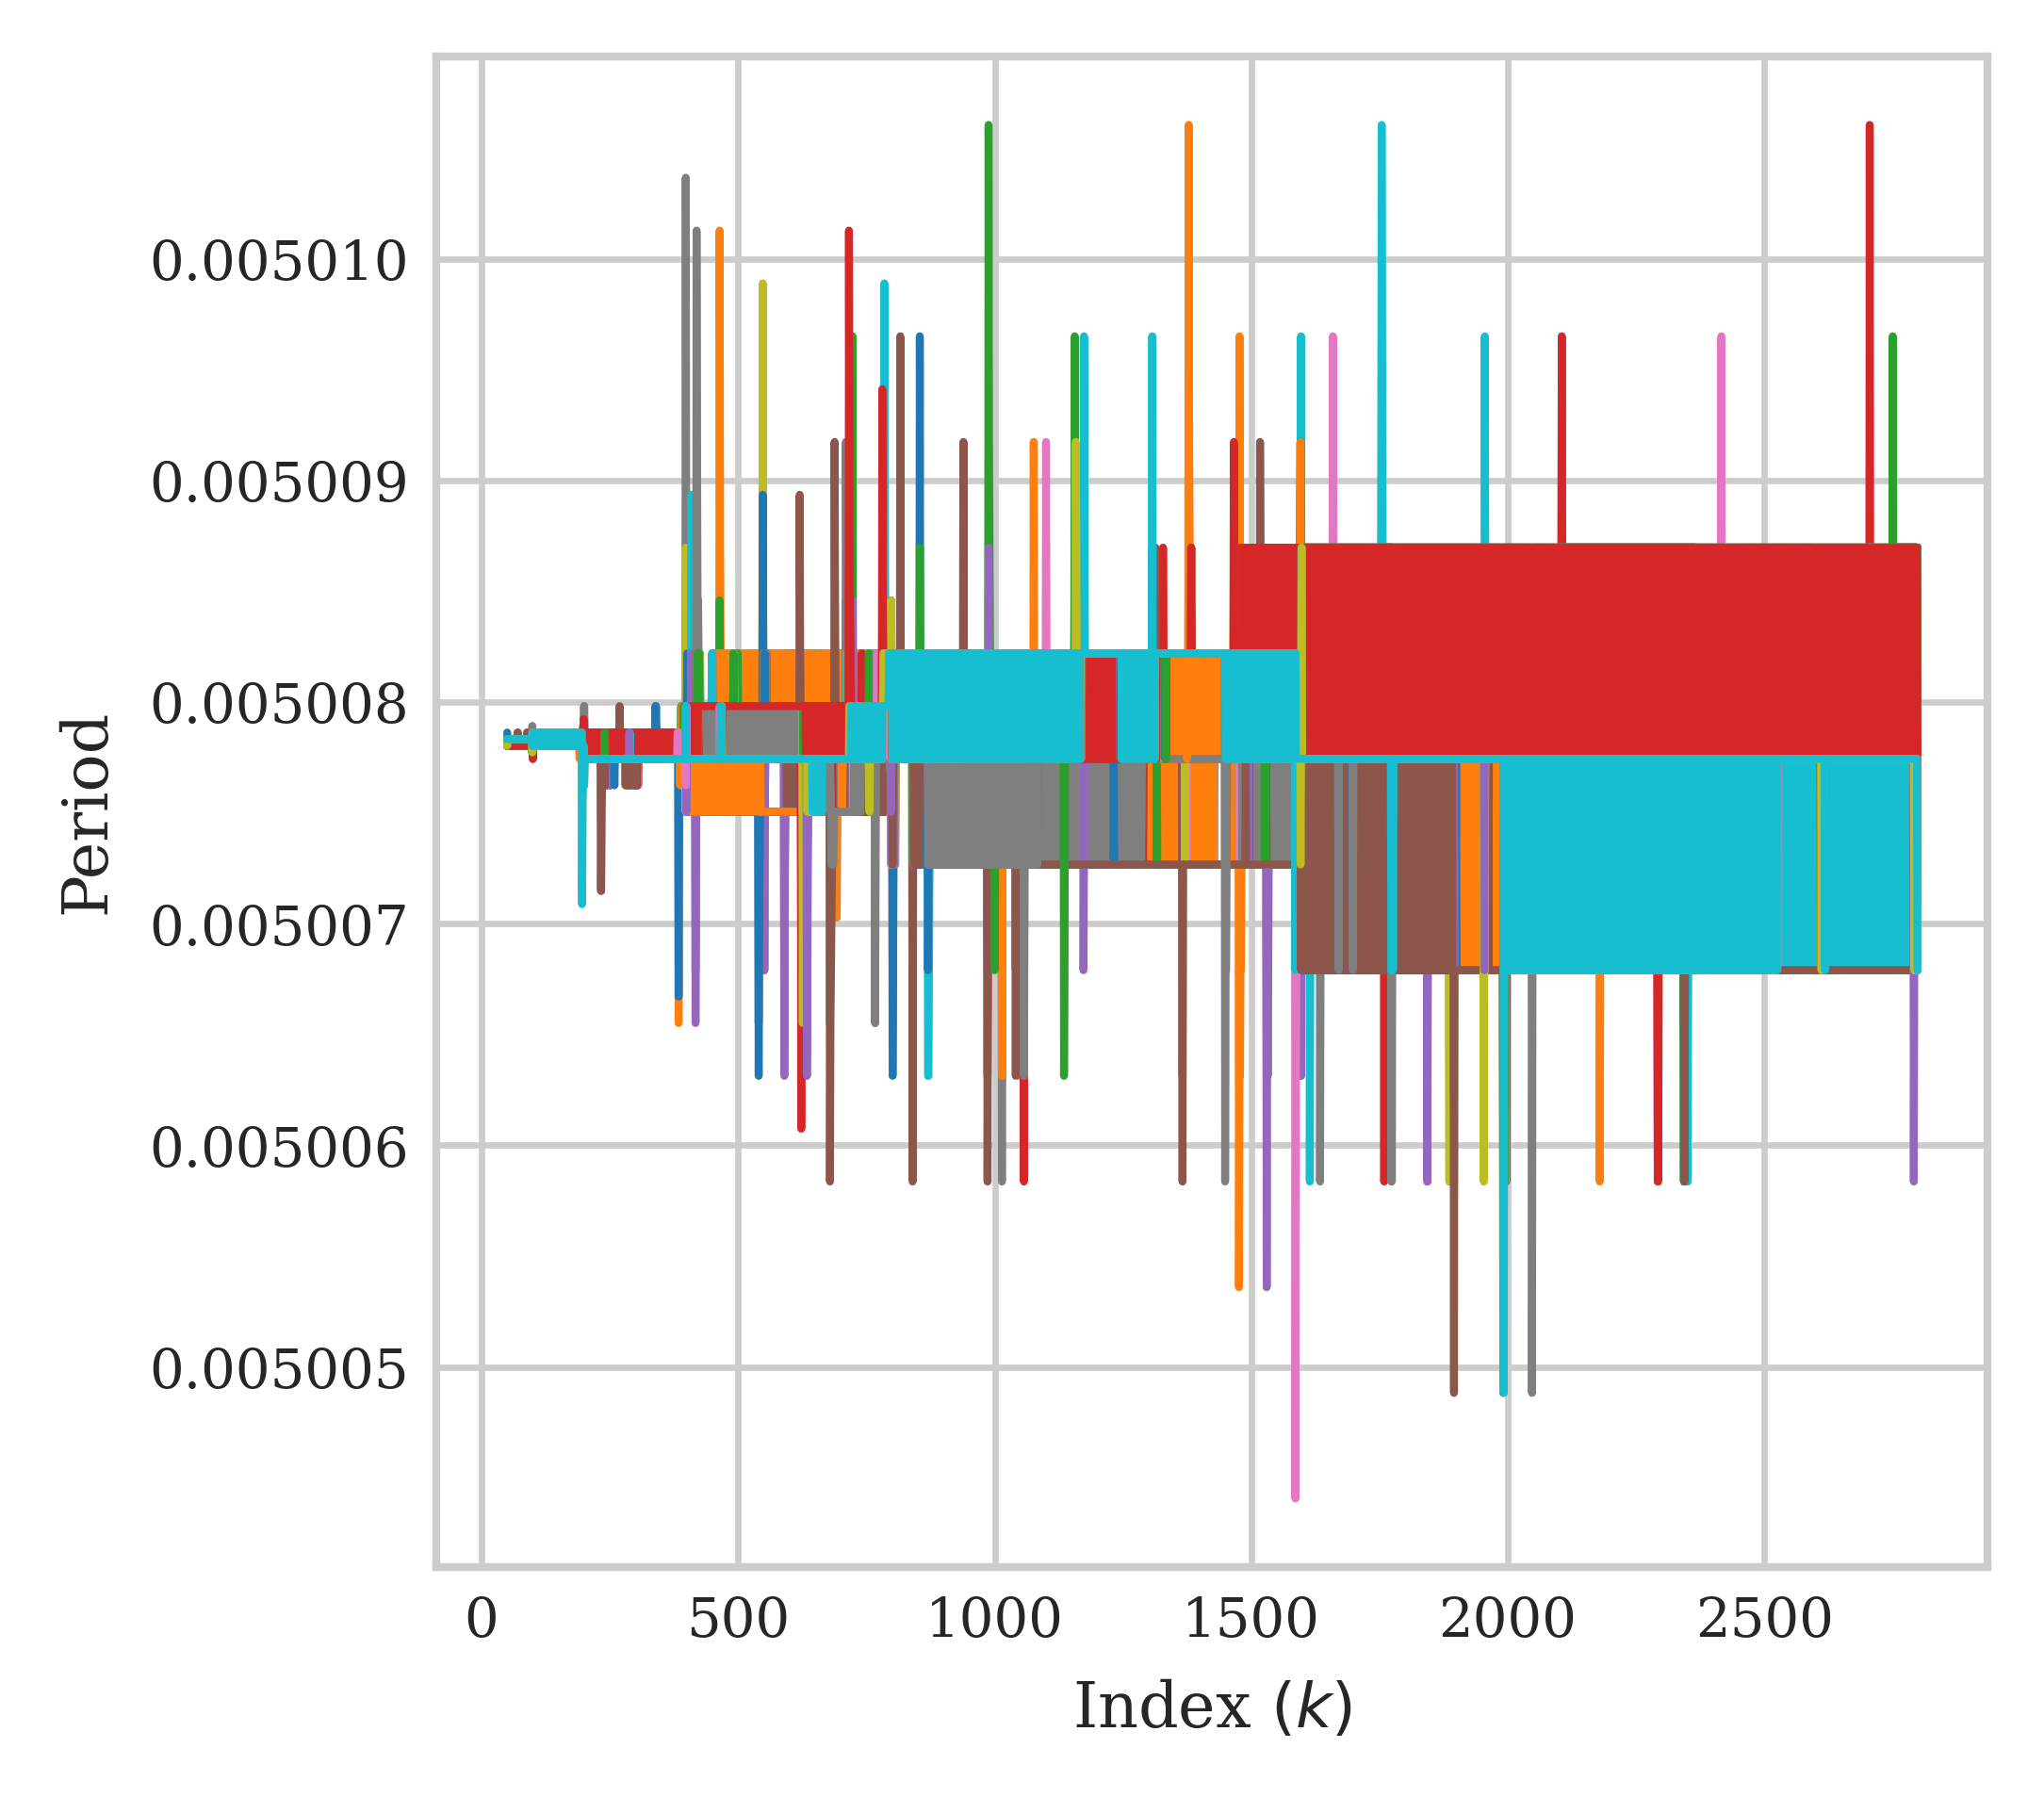

In [49]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig1=plt.figure(dpi=600)
fig1.set_size_inches(3.54,3.54)
MAT_period=torch.zeros(N_EXP,N,TT-1)
per_var=torch.zeros(TT-1)
per_mean_vec=torch.zeros(TT-1)#THIS SHOULD BE REMOVED

for ee in range(N_EXP):
    for ind in range(TT-1):
        for i in range(N):
            MAT_period[ee,i,ind]=MAT_timenump[ee,0,i,ind+1]-MAT_timenump[ee,0,i,ind]
#         per_var[ind]=torch.var(period[:,ind])

for exp in range(N_EXP):
    for node in range(N):
        plt.plot(range(50,TT-1),(MAT_period[exp,node,50:TT-1]), linewidth=1)
plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('Period', fontsize=8)

Text(0, 0.5, 'Period')

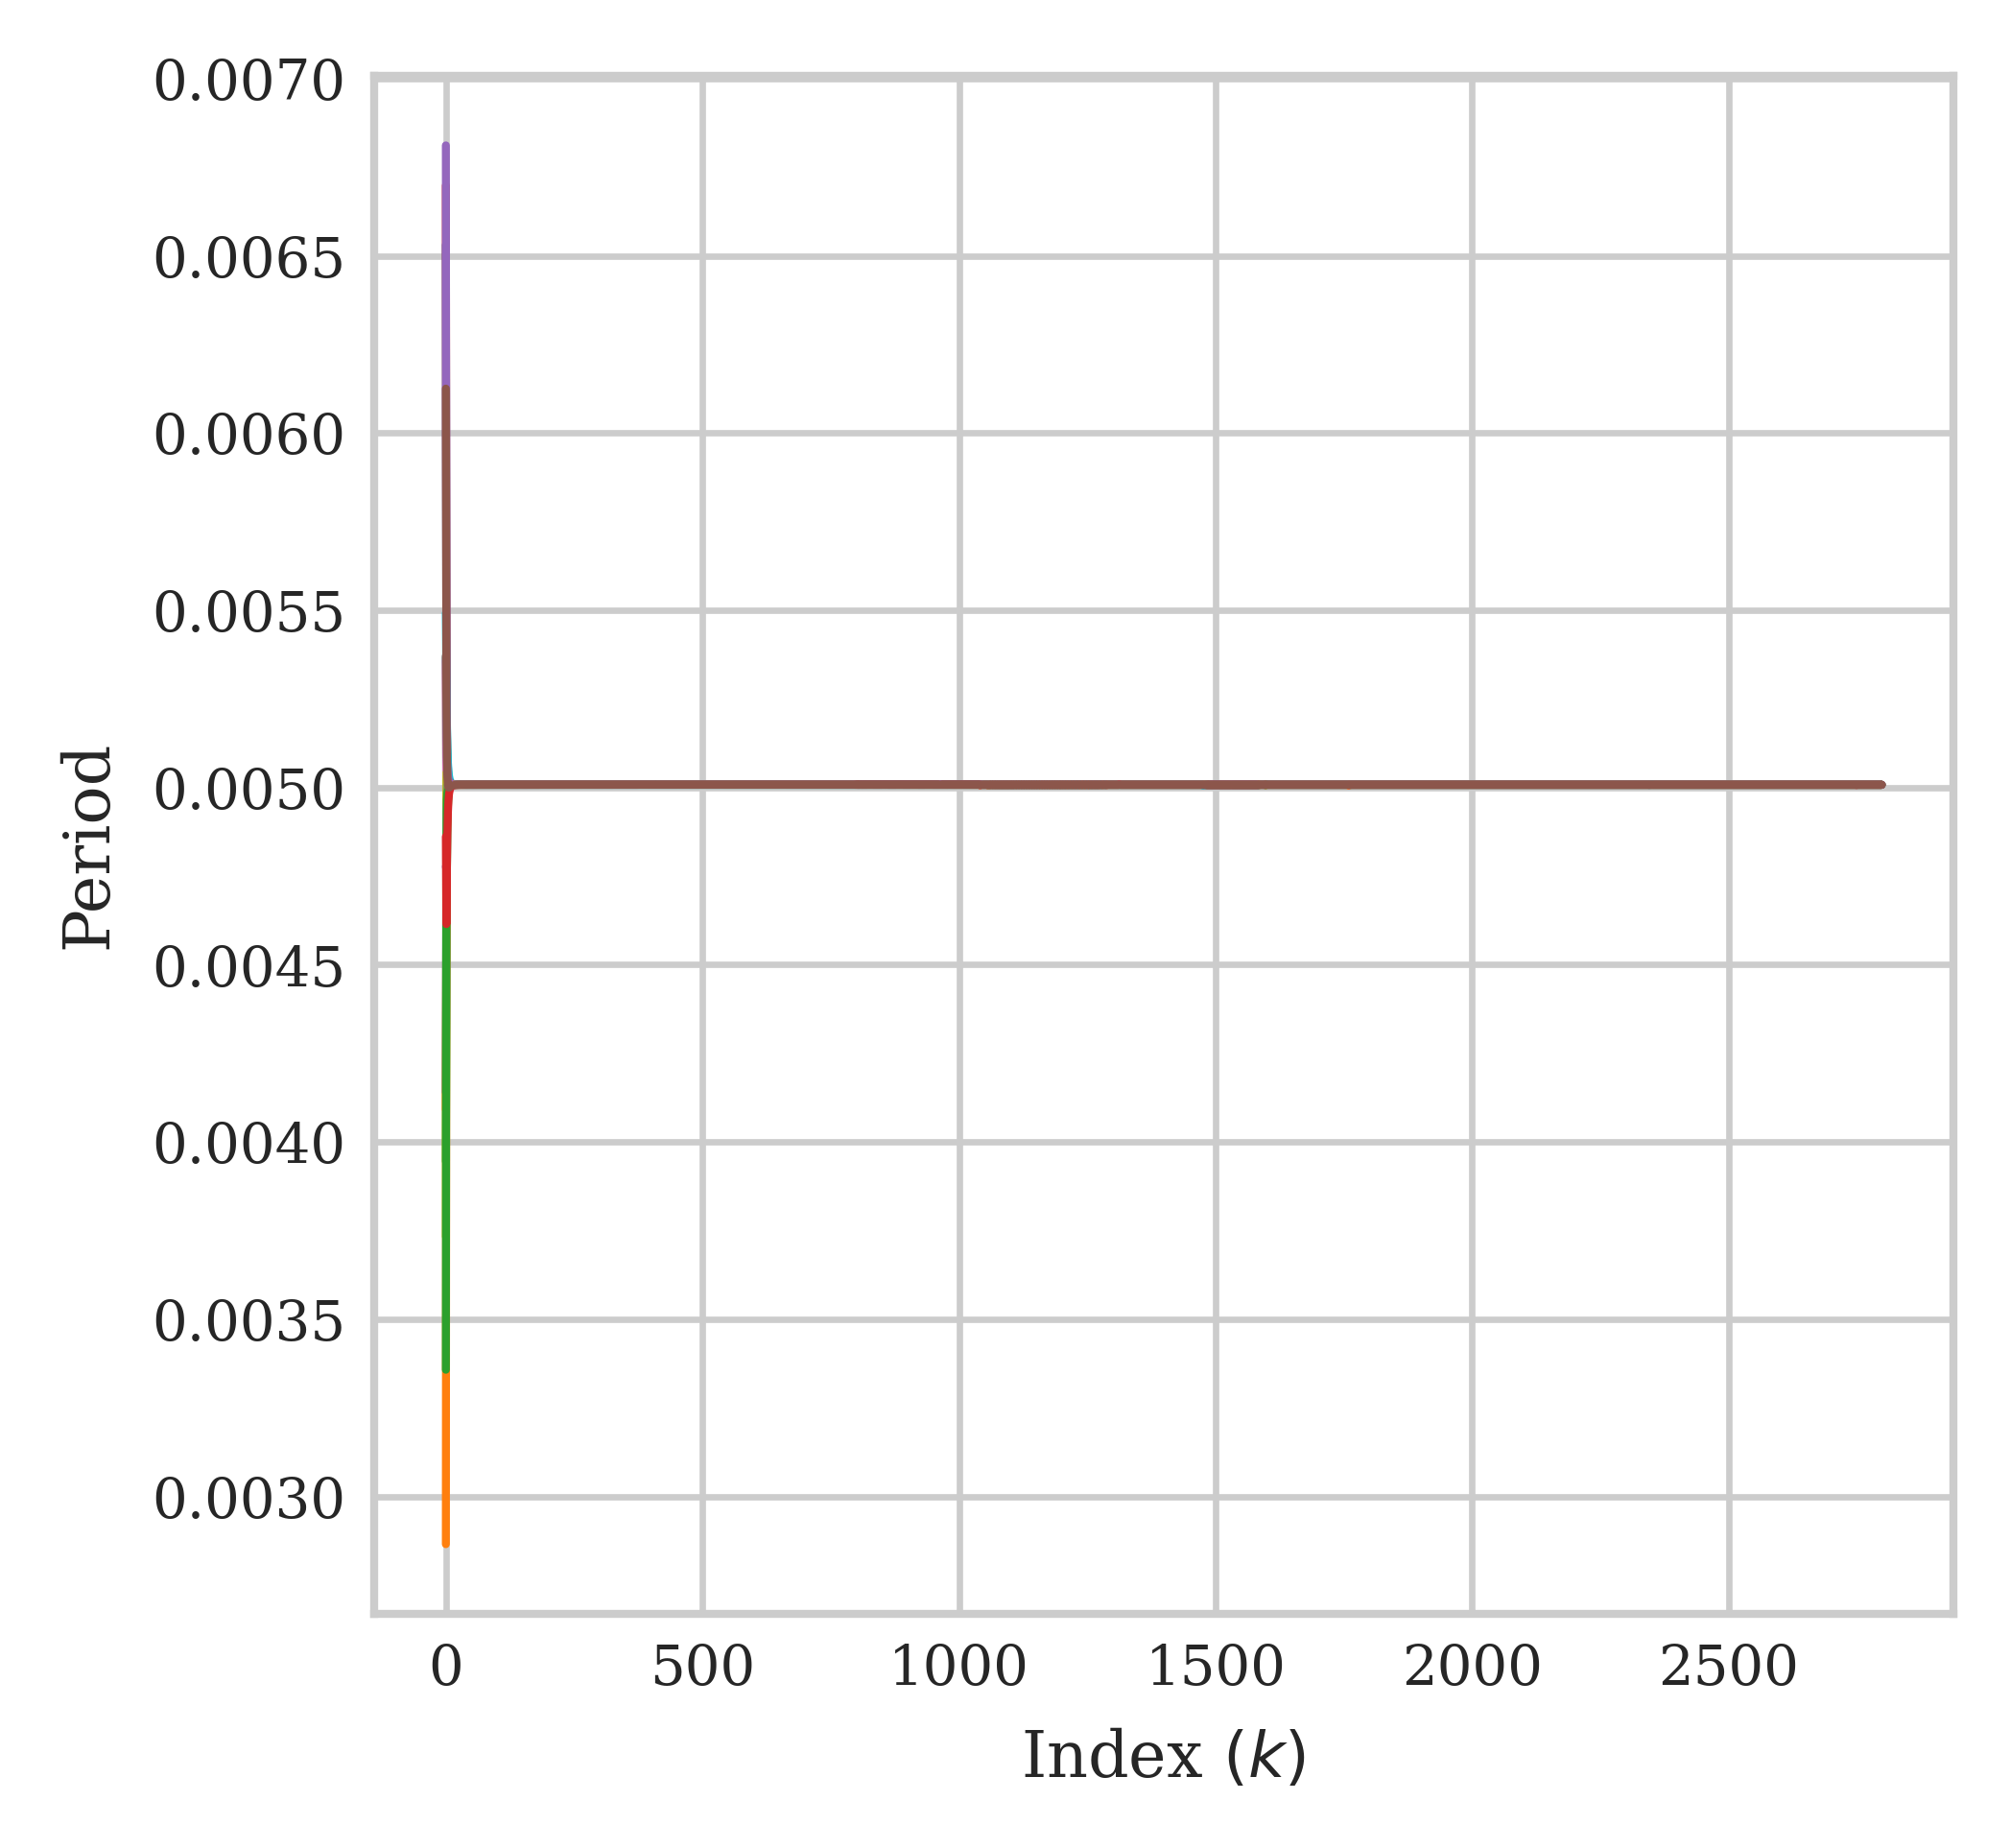

In [50]:
# PLOT OF PERIOD
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig2=plt.figure(dpi=600)
fig2.set_size_inches(3.54,3.54)

for node in range(N):
    plt.plot(range(0,TT-1),(MAT_period[Expref,node,0:TT-1]), linewidth=1)
plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('Period', fontsize=8)

Text(0, 0.5, 'Period')

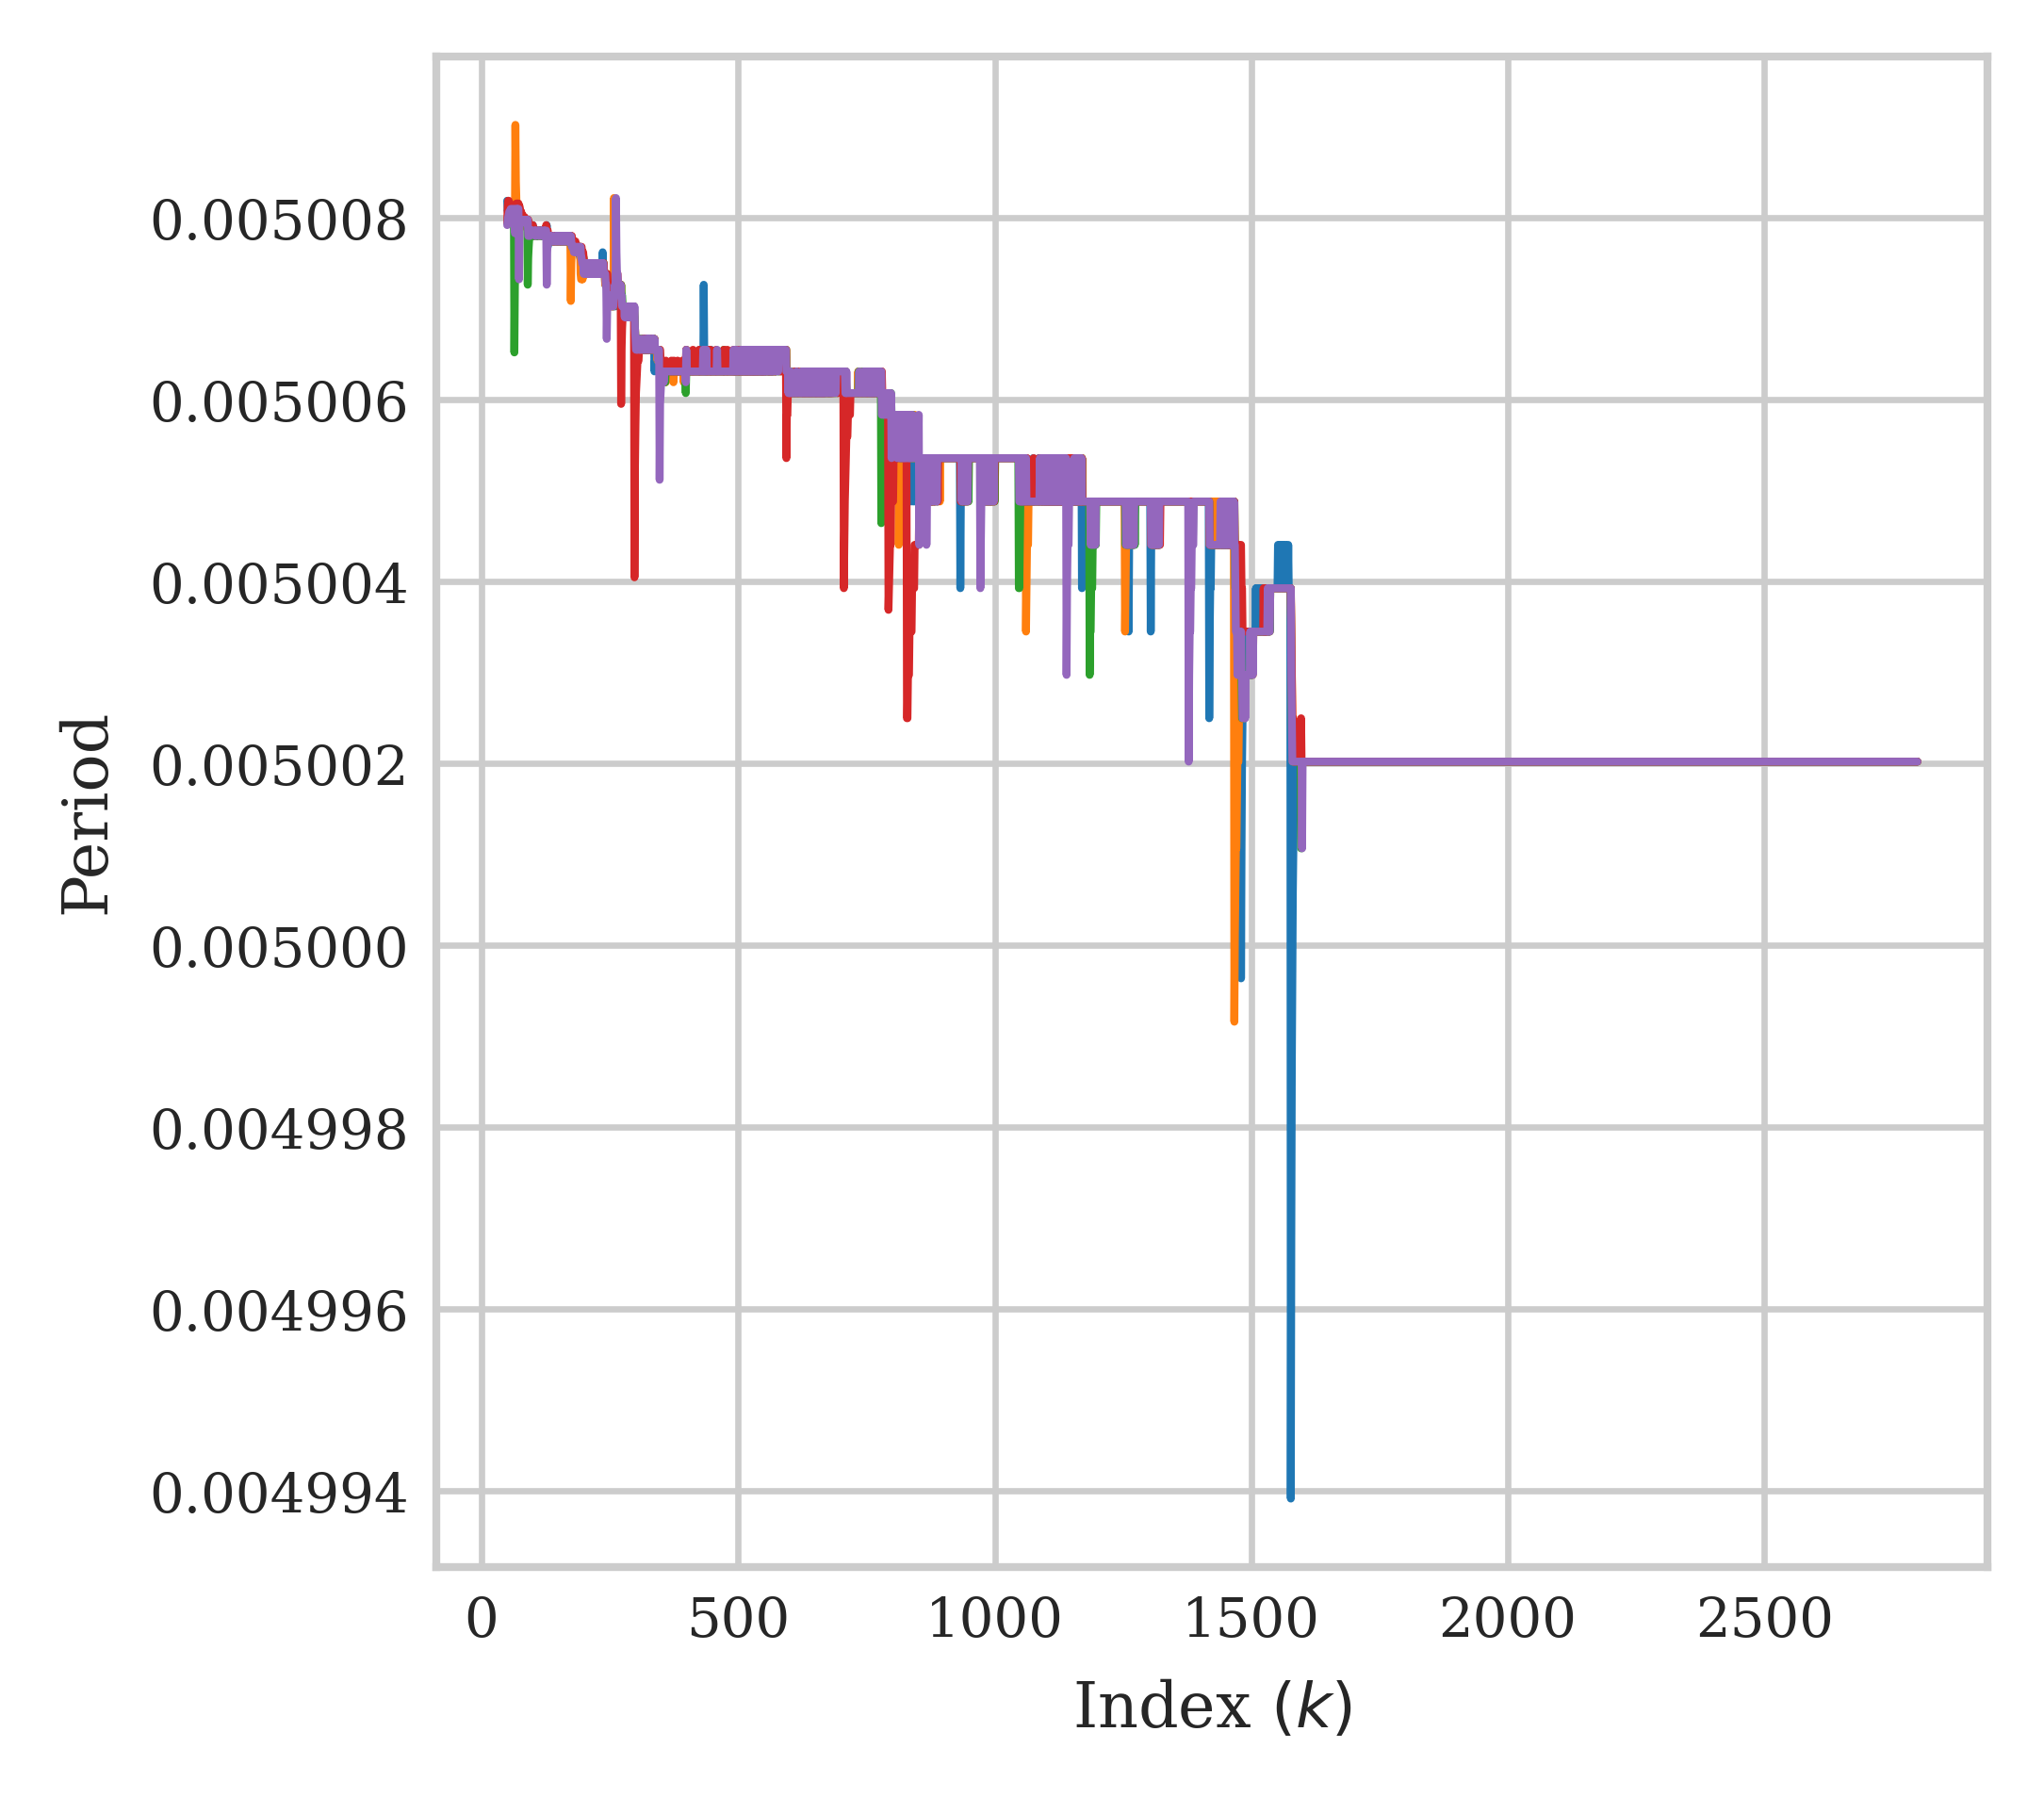

In [15]:
#PLOT MOBILE NODES FREQ
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig1=plt.figure(dpi=600)
fig1.set_size_inches(3.54,3.54)
per_var=torch.zeros(TT-1)

plt.plot(range(50,TT-1),(MAT_period[Expref,1,50:TT-1]), linewidth=1)
plt.plot(range(50,TT-1),(MAT_period[Expref,2,50:TT-1]), linewidth=1)
plt.plot(range(50,TT-1),(MAT_period[Expref,3,50:TT-1]), linewidth=1)
plt.plot(range(50,TT-1),(MAT_period[Expref,11,50:TT-1]), linewidth=1)
plt.plot(range(50,TT-1),(MAT_period[Expref,12,50:TT-1]), linewidth=1)
plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('Period', fontsize=8)    


Text(0, 0.5, 'Period')

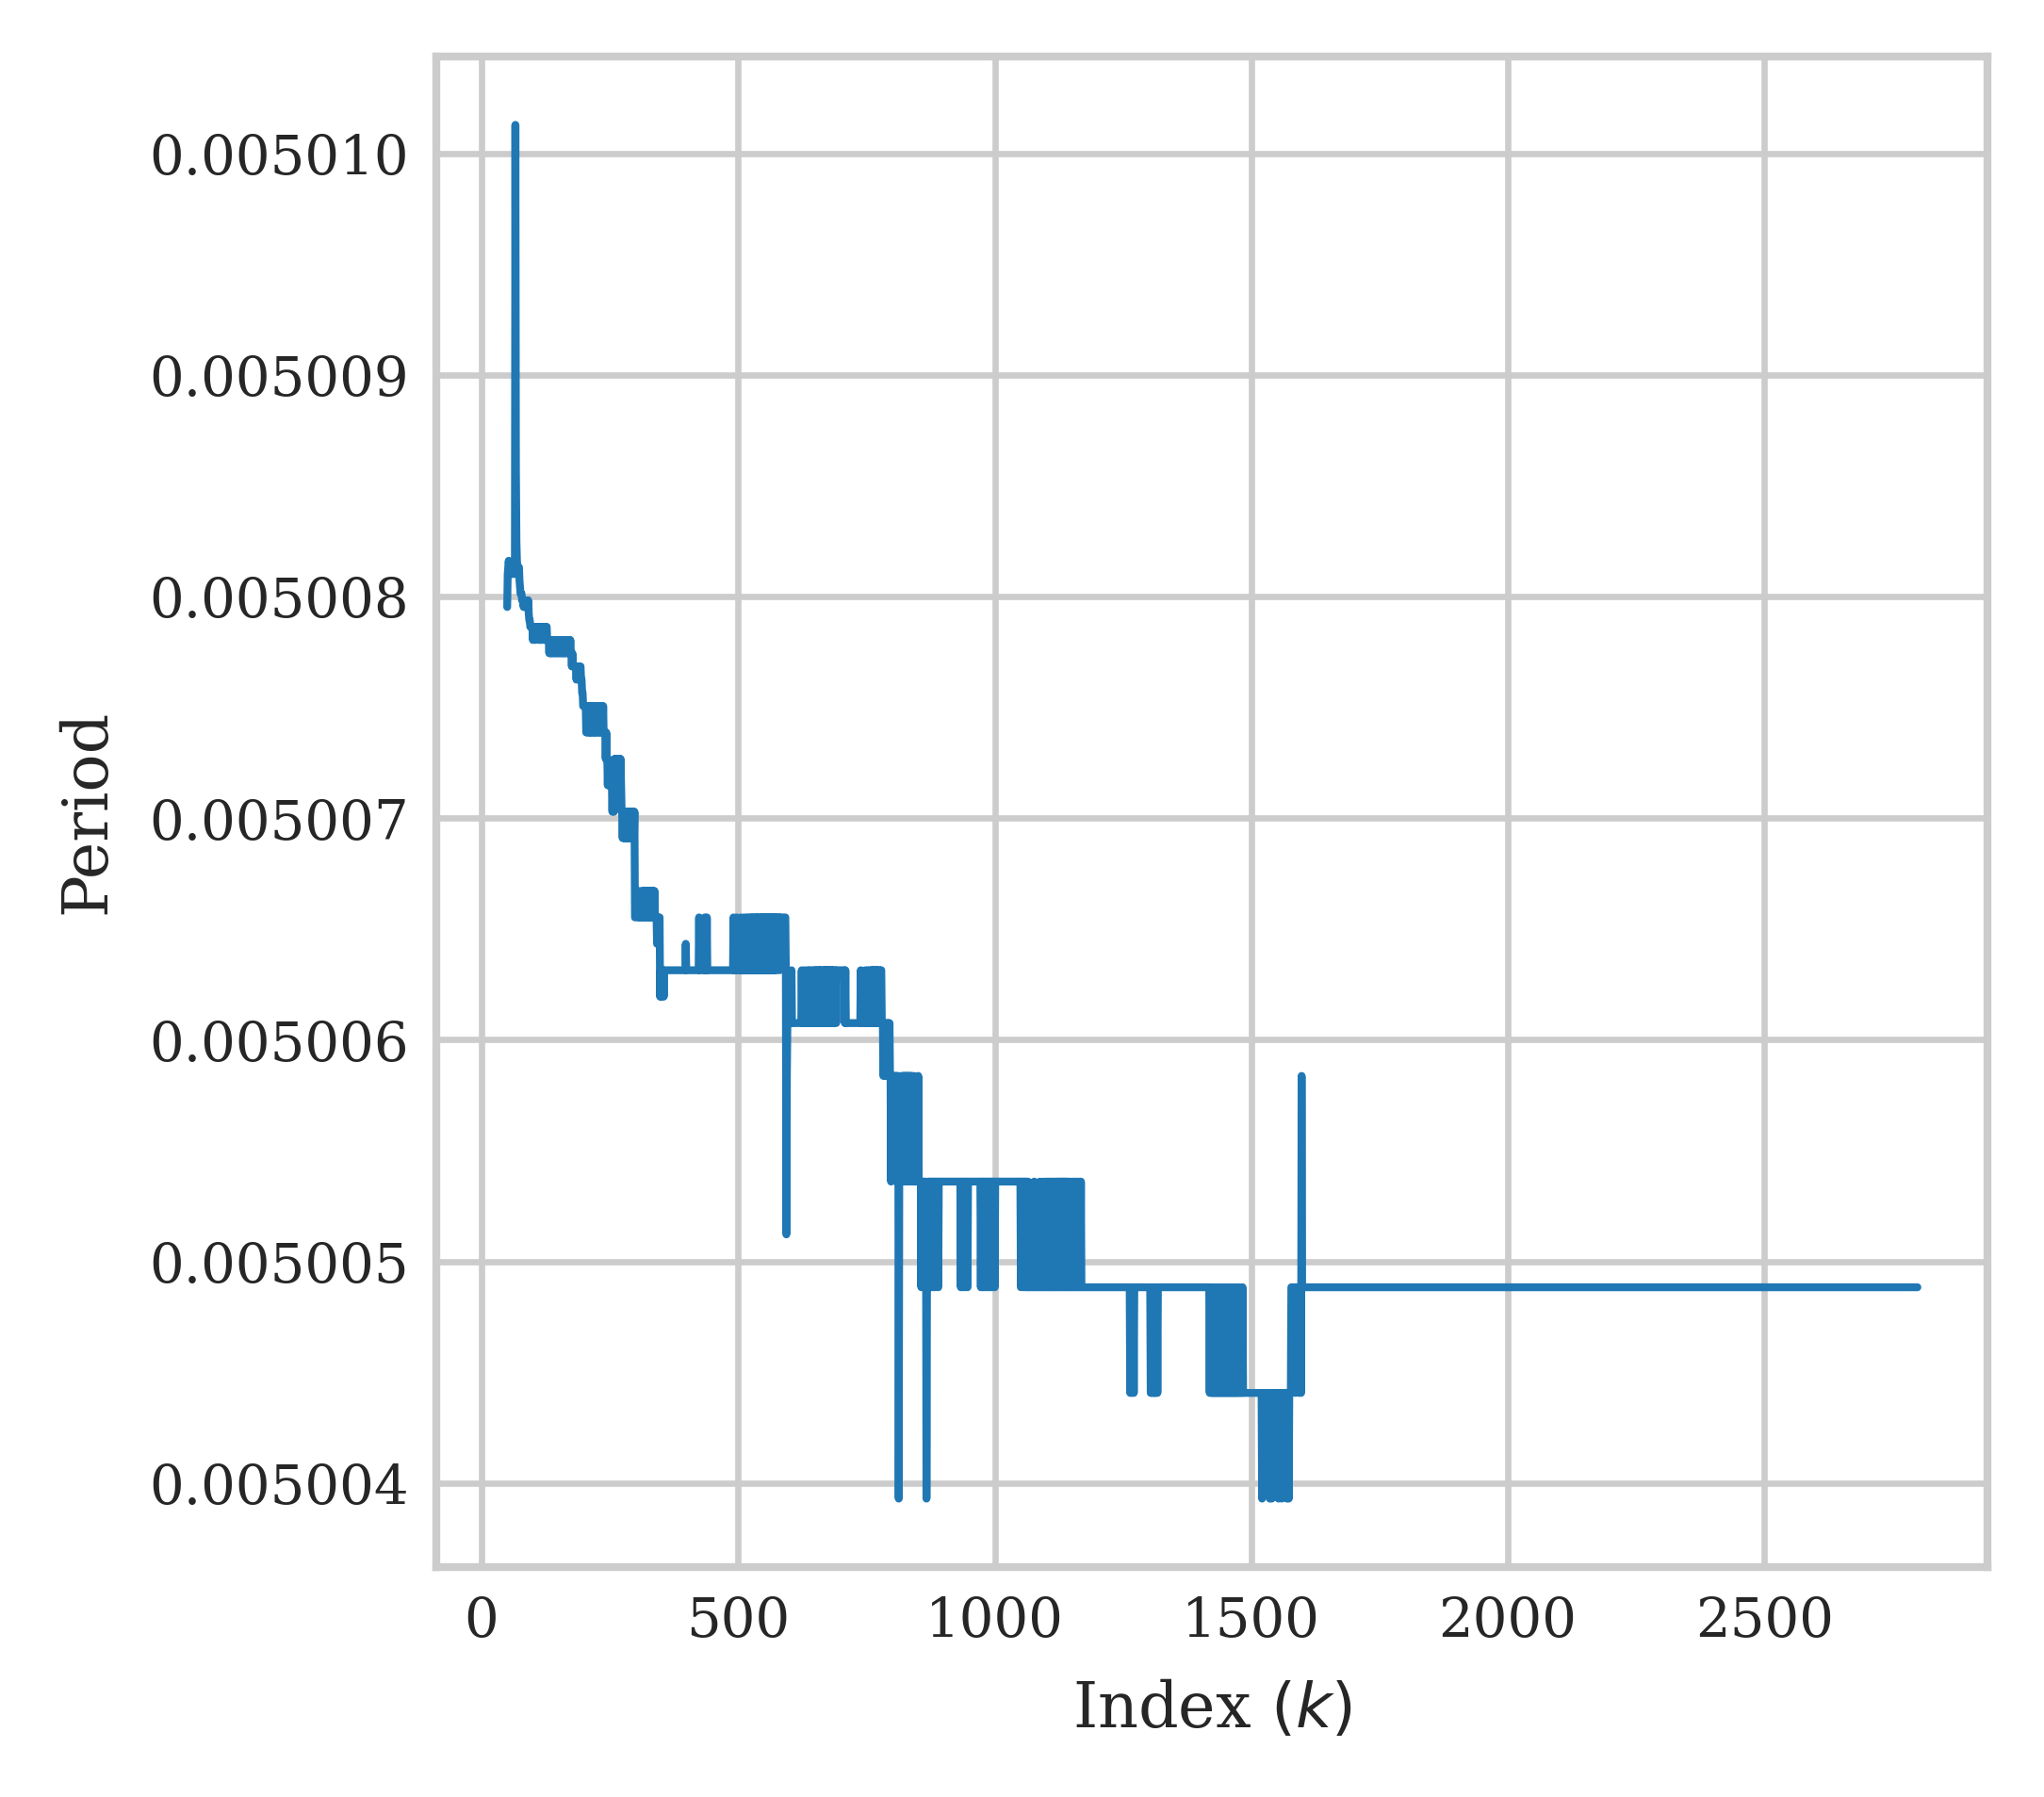

In [16]:
#PLOT STATICNODES FREQ
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig1=plt.figure(dpi=600)
fig1.set_size_inches(3.54,3.54)
per_var=torch.zeros(TT-1)
# for exp in range(N_EXP):

for node in range(0,3):
    if (node==1 or node==2 or node==3 or node==11 or node==12):
        continue
    else:
        plt.plot(range(50,TT-1),(MAT_period[Expref,node,50:TT-1]), linewidth=1)

plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('Period', fontsize=8)    

In [51]:
per_allexp=np.zeros((N_EXP,N,2800))
per_mean_allexp=np.zeros((N_EXP,2800))


for exp in range (N_EXP):
    for ind in range(2800):
        if ind==0:
            per_allexp[exp,:,ind]=MAT_timenump[exp,0,:,ind]
            per_mean_allexp[exp,ind]=np.mean(per_allexp[exp,:,ind])
        else:
            per_allexp[exp,:,ind]=MAT_timenump[exp,0,:,ind]-MAT_timenump[exp,0,:,ind-1]
            per_mean_allexp[exp,ind]=np.mean(per_allexp[exp,:,ind])
        
        
per_exp_branch=np.zeros((5,2800))
per_mean_exp_branch=np.zeros((1,2800))  


per_exp_branch[0,:]=per_allexp[Expref,1,:]
per_exp_branch[1,:]=per_allexp[Expref,2,:]
per_exp_branch[2,:]=per_allexp[Expref,3,:]
per_exp_branch[3,:]=per_allexp[Expref,11,:]
per_exp_branch[4,:]=per_allexp[Expref,12,:]


for ind in range(2800):
    per_mean_exp_branch[0,ind]=per_mean_allexp[Expref,ind]

for ind in range(2800):
    if (ind>reftime):
        per_allexp[Expref,1,ind]=0
        per_allexp[Expref,2,ind]=0
        per_allexp[Expref,3,ind]=0
        per_allexp[Expref,11,ind]=0
        per_allexp[Expref,12,ind]=0
        per_mean_allexp[Expref,ind]=np.sum(per_allexp[Expref,:,ind])/11
        per_mean_exp_branch[0,ind]=np.mean(per_exp_branch[:,ind])


Text(0, 0.5, '$\\phi_i(k)$ mod $T_{c,DNN}(k)$')

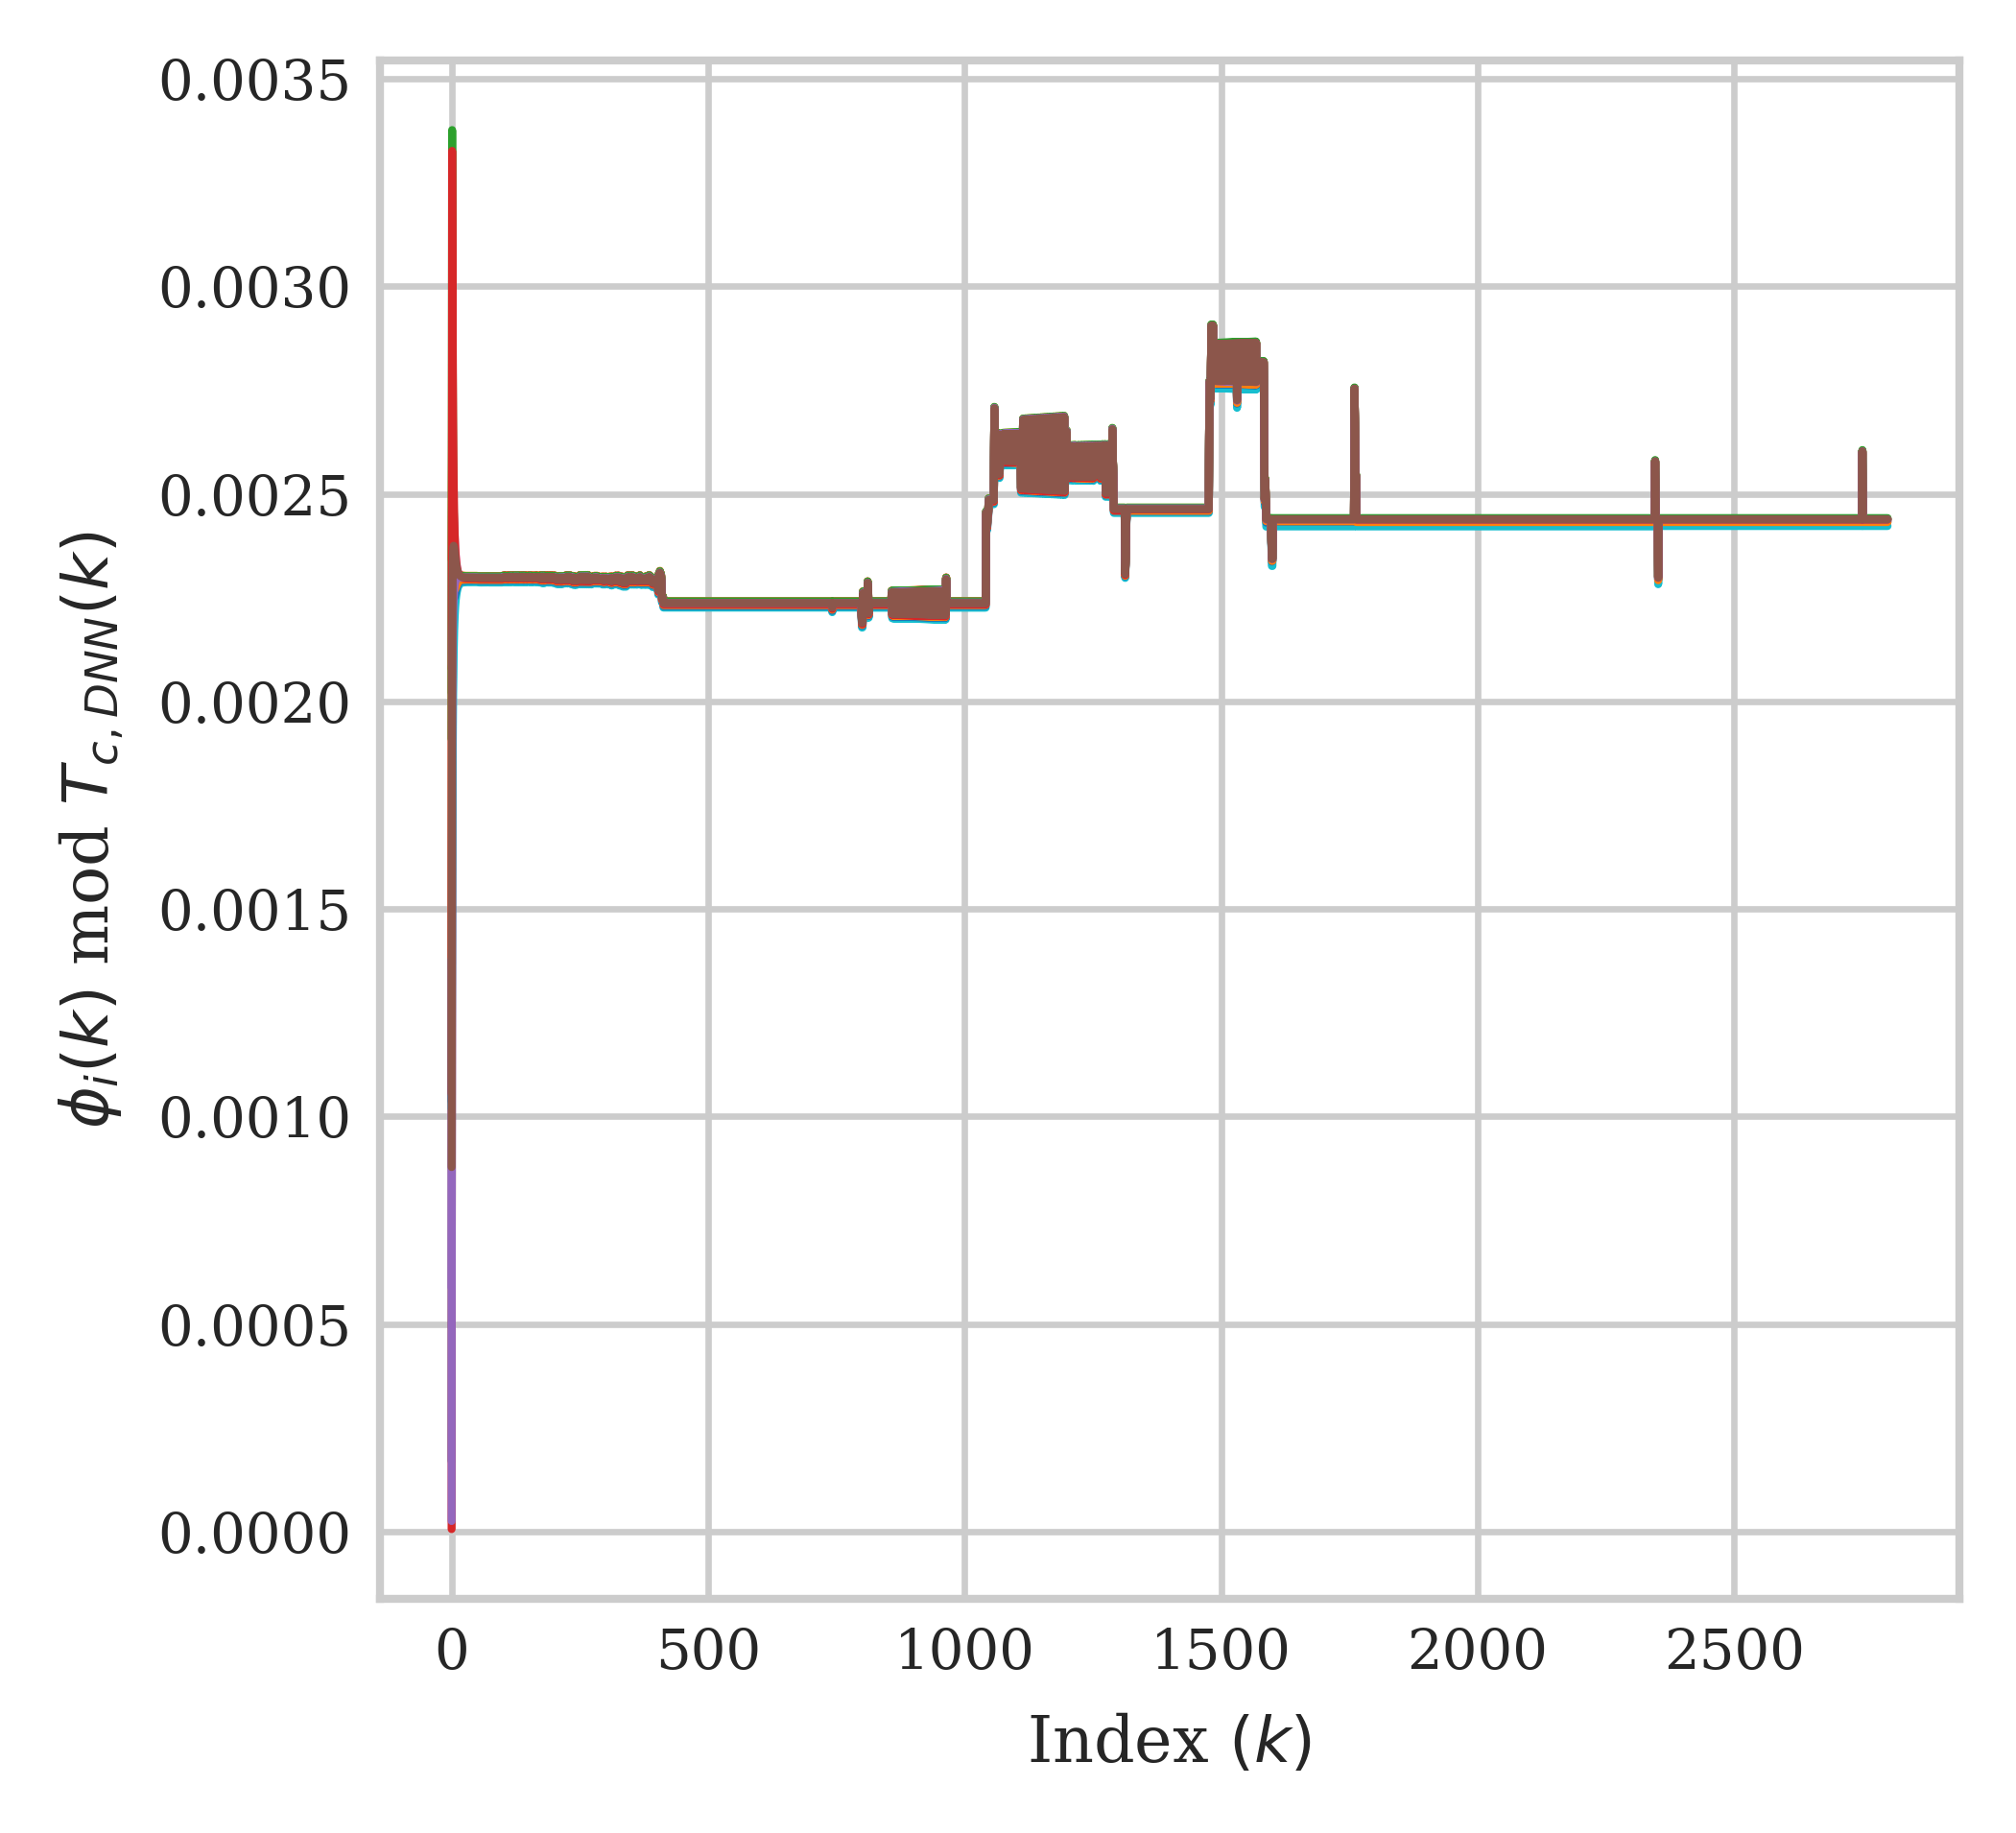

In [53]:
modulo=np.zeros((N,TT))

fig=plt.figure(dpi=600)
fig.set_size_inches(3.54,3.54)
# per_mean_exp[9,0]=torch.mean(torch.tensor(time_exp[exp,0,:,1215]-time_exp[exp,0,:,1214]))

for ind in range(TT):
    for node in range (N):
        if (ind<=reftime):
            modulo[node,ind]=MAT_timenump[Expref,0,node,ind]%per_mean_allexp[Expref,ind]
        
        elif ((ind>reftime) and (node==1 or node==2 or node==3 or node==11 or node==12)):
            modulo[node,ind]=MAT_timenump[Expref,0,node,ind]%per_mean_exp_branch[0,ind]
       
        else:
            modulo[node,ind]=MAT_timenump[Expref,0,node,ind]%per_mean_allexp[Expref,ind]



for node in range(N):
    plt.plot(modulo[node,:], linewidth=1)
plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('$\phi_i(k)$ mod $T_{c,DNN}(k)$', fontsize=8)
# plt.legend(['N1','N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N12','N13','N14','N15','N16',],loc="upper left",fontsize='8')

Text(0, 0.5, 'NPD range')

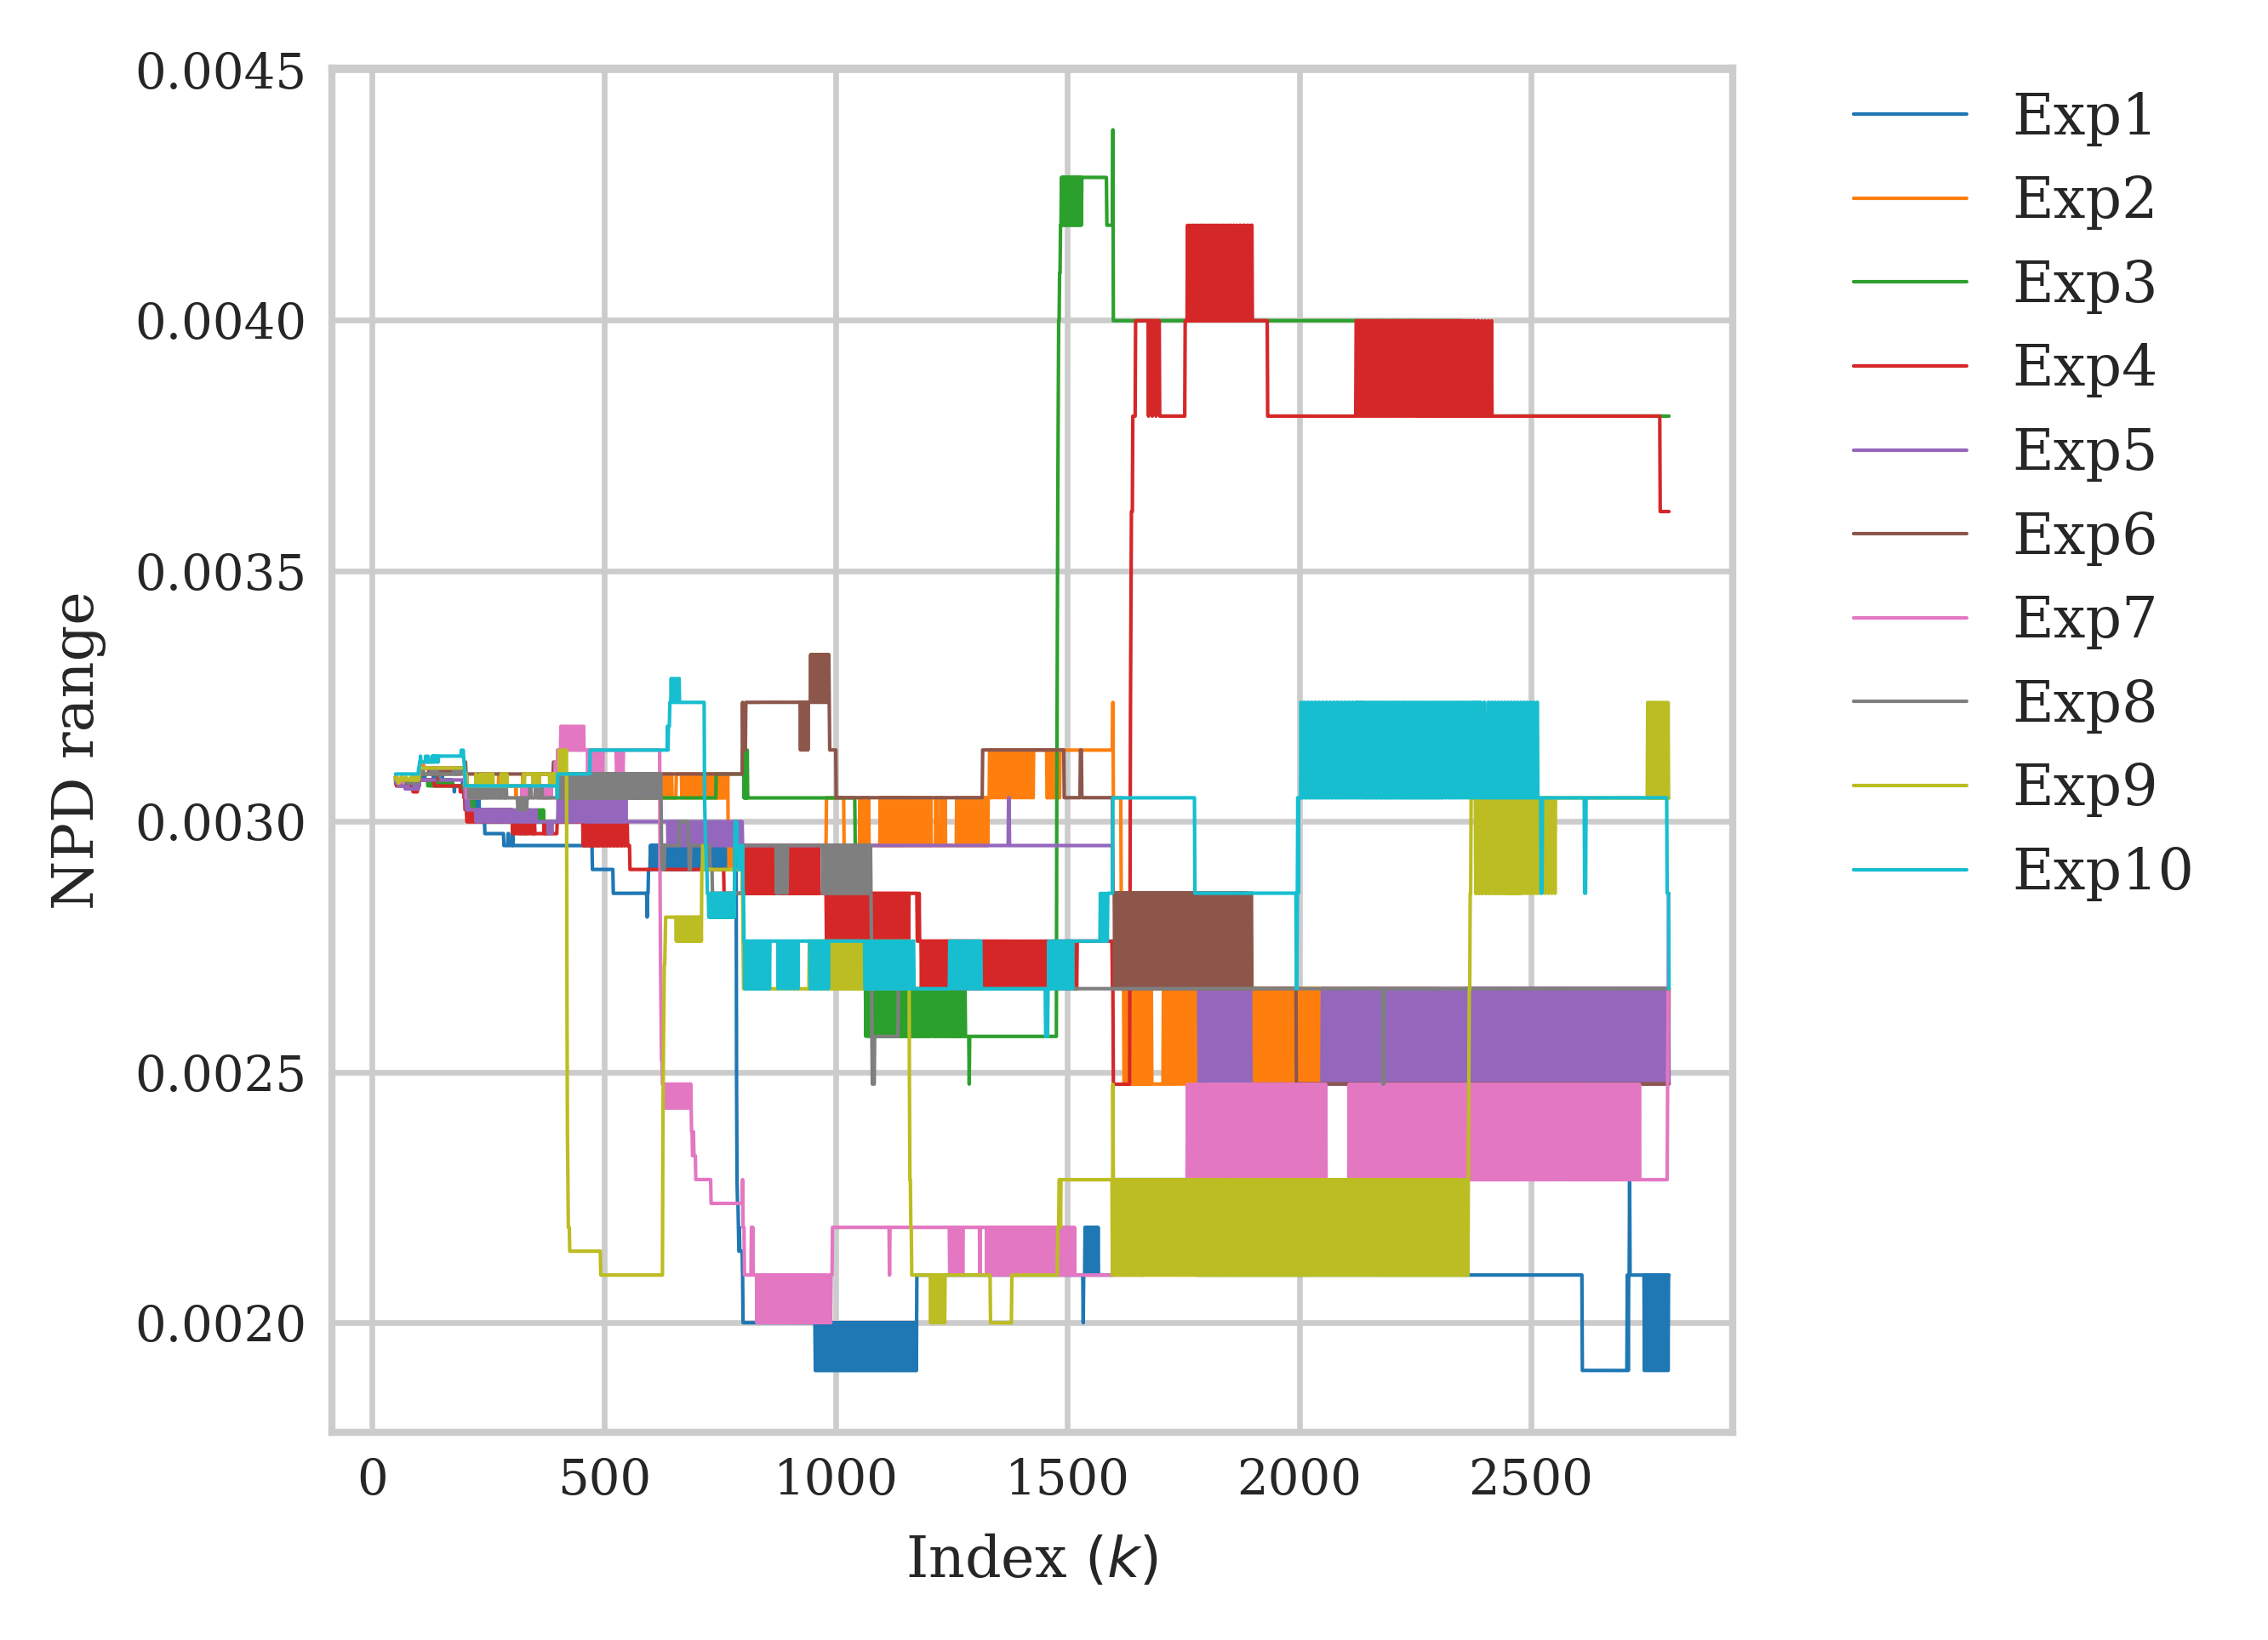

In [55]:
# PLOT NPD RANGE FOR ALL EXPERIMENTS

MAT_norm_delay=np.zeros([N_EXP,N,TT])
MAT_Delay_spread=np.zeros((N_EXP,TT))
for exp in range(N_EXP):
    for ind in range(TT):
        for node in range(N):
            MAT_norm_delay[exp,node,ind]=(MAT_timenump[exp,0,node,ind]-MAT_timenump[exp,0,0,ind])/per_mean_allexp[exp,ind]
        MAT_Delay_spread[exp,ind]=np.amax(MAT_norm_delay[exp,:,ind])-np.amin(MAT_norm_delay[exp,:,ind])
        

    
fig=plt.figure(dpi=600)
fig.set_size_inches(3.54,3.54)
for exp in range(N_EXP):
        plt.plot(range(50,2799),torch.tensor(MAT_Delay_spread[exp,50:2799]), linewidth=0.5)
plt.legend(['Exp1','Exp2','Exp3','Exp4','Exp5','Exp6','Exp7','Exp8','Exp9','Exp10',],bbox_to_anchor=(1.07,1), borderaxespad=0,fontsize='8')
plt.xlabel('Index $(k)$', fontsize=8)
plt.ylabel('NPD range', fontsize=8)
# print('Maximum delay spread:', np.amax(MAT_Delay_spread))
# print('Minimum delay spread:', np.amin(MAT_Delay_spread))